# SIMPLE LINEAR REGRESSION

## QUESTION - 2

### Statement :- Salary_hike -> Build a prediction model for Salary_hike

### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

# --------------------------------------------------------------------------------------------------------------

## 1. Importing Libraries :

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## 2. Importing dataset :

In [2]:
salary_dataset = pd.read_csv('Salary_Data.csv',sep=',')
salary_dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## 3. Data Underatanding :

### 3.1 Initial Analysis :

In [3]:
salary_dataset.shape

(30, 2)

In [4]:
salary_dataset.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
salary_dataset.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

### 3.2 Data Preparation :

In [6]:
# Renaming columns to build our model
salary_dataset.columns = ['years_experience','salary']
salary_dataset.head()

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### 3.3 Assumptions Check :

#### Assumption 1 :- Linearity check

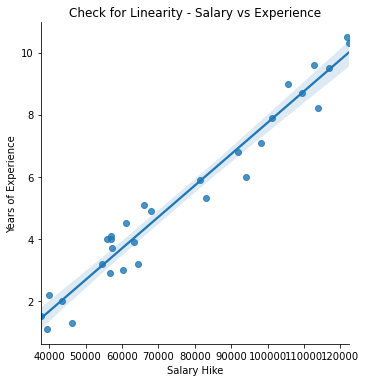

In [9]:
sns.lmplot(x = 'salary', y = 'years_experience', data = salary_dataset)
plt.title('Check for Linearity - Salary vs Experience')
plt.xlabel('Salary Hike')
plt.ylabel('Years of Experience')
plt.show()

#### OBSERVATION :- 
Linearity test **"PASSED"**.

#### Assuption 2 :- Normality Test

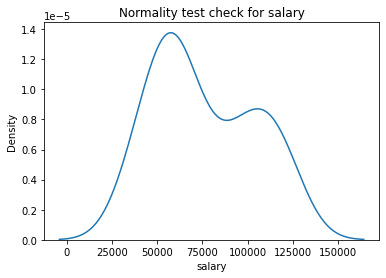

In [10]:
sns.distplot(a = salary_dataset['salary'],hist = False)
plt.title('Normality test check for salary')
plt.show()

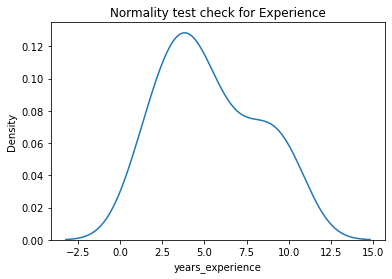

In [14]:
sns.distplot(a = salary_dataset['years_experience'],hist = False)
plt.title('Normality test check for Experience')
plt.show()

#### OBSERVATION :-
Normality test **"FAILED"**.

#### Assumption 3 - Multicollinearity check

In [11]:
salary_correlation_matrix = salary_dataset.corr()
salary_correlation_matrix

,years_experience,salary
years_experience,1.000000,0.978242
salary,0.978242,1.000000


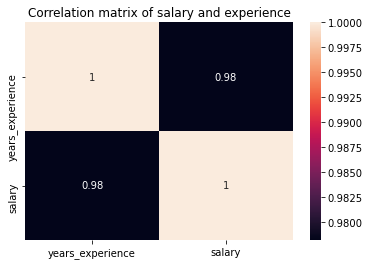

In [13]:
sns.heatmap(salary_correlation_matrix, annot = True)
plt.title('Correlation matrix of salary and experience')
plt.show()

#### OBSEERVATION:-
Multicollinearity check **"FAILED"**.

#### Assumption 4:- Auto-Regression check

#### OBSERVATION :- Auto-Regression check "PASSED".

#### Assumption 5 :- Homoscadascity check || Assumption 6:- Zero Residual Mean check

#### OBSERVATION :- These tests can be performed after "Post Model Training".

### 4. Model Building :

#### Using statsmodel library

In [15]:
import statsmodels.formula.api as smf
salary_hike_linear_model = smf.ols(formula = 'salary ~ years_experience',data = salary_dataset).fit()
salary_hike_linear_model

### 5. Model Testing :

In [16]:
salary_hike_linear_model.params

Intercept           25792.200199
years_experience     9449.962321
dtype: float64

In [17]:
salary_hike_linear_model.tvalues

Intercept           11.346940
years_experience    24.950094
dtype: float64

In [18]:
salary_hike_linear_model.pvalues

Intercept           5.511950e-12
years_experience    1.143068e-20
dtype: float64

### 6. Model Training :

#### 6.1 Manual calculation :

In [22]:
#eauation is : y = mx + c

# from above testing results : c (intercept) = 25792.200199 and m (slope) = 9449.962321

# if x = 7 then y = ?
x = 7
# from equation above y can be computed :
y_1 = 9449.962321 * x + 25792.200199
y_1

91941.936446

In [21]:
#eauation is : y = mx + c

# from above testing results : c (intercept) = 25792.200199 and m (slope) = 9449.962321

# if x = 6 then y = ?
x = 6
# from equation above y can be computed :
y_1 = 9449.962321 * x + 25792.200199
y_1

82491.97412500001

#### 6.2 Machine calculation

In [23]:
# A new random data is created for the calculation of the machine and is imported.

salary_new_data = pd.read_csv('salary_new_data.csv',sep=',')
salary_new_data

,years_experience
0,8
1,7
2,6
3,12
4,13
5,14
6,15
7,11
8,2
9,3


In [24]:
predict_salary_hike = salary_hike_linear_model.predict(salary_new_data)
predict_salary_hike = pd.DataFrame(predict_salary_hike)
predict_salary_hike

,0
0,101391.898770
1,91941.936449
2,82491.974127
3,139191.748056
4,148641.710378
5,158091.672699
6,167541.635020
7,129741.785735
8,44692.124842
9,54142.087163


### 7. Model Evaluation :

In [25]:
salary_hike_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.14e-20
Time:                        22:44:58   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
years_experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
print('R2 Score             :',salary_hike_linear_model.rsquared)
print('R2 adjusted Score    :',salary_hike_linear_model.rsquared_adj)
print('AIC                  :',salary_hike_linear_model.aic)
print('BIC                  :',salary_hike_linear_model.bic)

R2 Score             : 0.9569566641435086
R2 adjusted Score    : 0.9554194021486339
AIC                  : 606.882316930432
BIC                  : 609.6847116937563


### 8. Model Deployement :

In [27]:
from pickle import dump

In [28]:
dump(salary_hike_linear_model,open('salary_hike.pkl','wb'))

In [29]:
from pickle import load

In [30]:
loaded_salary_hike_file = load(open('salary_hike.pkl','rb'))

In [31]:
loaded_salary_hike_file

In [32]:
loaded_salary_hike_file.predict(salary_new_data)

0     101391.898770
1      91941.936449
2      82491.974127
3     139191.748056
4     148641.710378
5     158091.672699
6     167541.635020
7     129741.785735
8      44692.124842
9      54142.087163
10    110841.861092
11    139191.748056
12     63592.049484
13     73042.011806
dtype: float64

# -----------------------------------------------------------------------------------------------------------

In [33]:
salary_dataset.head()

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [34]:
X = salary_dataset.drop(labels='salary',axis=1)
y= salary_dataset[['salary']]

In [35]:
X

,years_experience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [36]:
y

,salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [37]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_X= std_scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X,columns=['years_experience'])
scaled_X

,years_experience
0,-1.510053
1,-1.438373
2,-1.366693
3,-1.187494
4,-1.115814
5,-0.864935
6,-0.829096
7,-0.757416
8,-0.757416
9,-0.578216


In [38]:
scaled_X.mean()

years_experience   -7.401487e-18
dtype: float64

In [39]:
scaled_X.std()

years_experience    1.017095
dtype: float64

### Model Training

In [40]:
from sklearn.linear_model import LinearRegression
linear_model_1 = LinearRegression()
linear_model_1.fit(scaled_X,y)

LinearRegression()

### Model Testing

In [41]:
salary_hike_predict = linear_model_1.predict(scaled_X)
salary_hike_predict

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

### Model Evaluation

In [43]:
error = y - salary_hike_predict
error

,salary
0,3155.841248
1,8127.848783
2,-2236.143681
3,-1167.124842
4,-6691.117306
5,3444.909069
6,6007.912837
7,-1587.079627
8,8412.920373
9,-3568.060788


### Now check assumption 5 :- Homoscadascity check

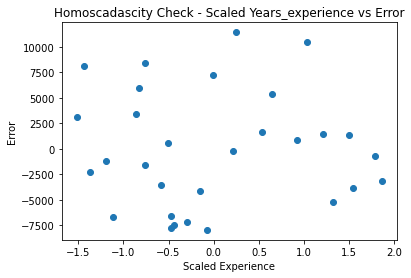

In [44]:
plt.scatter(x=scaled_X['years_experience'],y=error)
plt.title('Homoscadascity Check - Scaled Years_experience vs Error')
plt.xlabel('Scaled Experience')
plt.ylabel('Error')
plt.show()

#### OBSERVATION :-
Homoscadascity check **"FAILED"**.

### Now check for Zero Residual Mean Error check

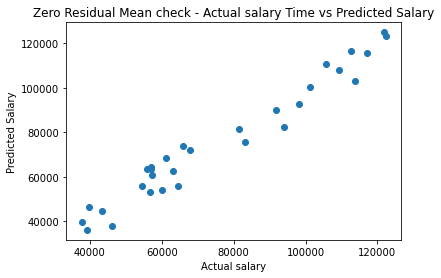

In [45]:
plt.scatter(x=y, y=salary_hike_predict)
plt.title('Zero Residual Mean check - Actual salary Time vs Predicted Salary')
plt.xlabel('Actual salary')
plt.ylabel('Predicted Salary')
plt.show()